In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.naive_bayes import BernoulliNB

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
%matplotlib inline

# Analyze the amazon reviews

In [2]:
amazon = pd.read_csv("amazon_cells_labelled.txt", delimiter = '\t', header = None)
amazon.columns = ['sentence', 'score']

In [3]:
amazon.tail()

,sentence,score
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0
999,"You can not answer calls with the unit, never ...",0


In [4]:
amazon.score.value_counts()

1    500
0    500
Name: score, dtype: int64

 There are 500 positive and 500 negative reviews in the dataset.

There are few sentences which has mixed case letters. Let's convert all to lower case

In [48]:
amazon['sentence'] = amazon['sentence'].str.lower()

In [49]:
# To analyze the frequently used negative words
all_sent = ''.join(amazon[amazon.score==0].sentence.values)
all_sent_list = all_sent.replace(',','').split(' ')
d= Counter(all_sent_list)
print()
count_df = pd.DataFrame.from_dict(d,orient='index').reset_index().rename(columns={'index':'event', 0:'count'})
count_df.sort_values(by='count', ascending=False).to_csv('neg_word_list_amazon.csv')

From the above step we filtered few keywords for our use:

In [71]:
neg_keywords= ['worst','cheap','problem','disappoint','hate','mistake','useless','horrible','terrible','trouble',
           'awful','waste','lack','uncomfortable','unreliable','embarrassing','flimsy','poor','unhappy',
          'suck','flaw','pain','nightmare','warning','hurt']
print(len(neg_keywords))


25


# Analyse based on Negative Keywords

# Iteration 1:
Appying BernoulliNB on full dataset

Checking that variables are independent from each other using a correlation heatmap.

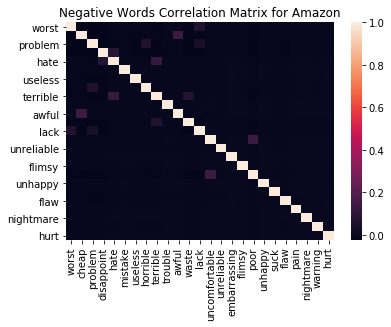

In [77]:
# create columns for every keyword
data = pd.DataFrame()
for key in neg_keywords:
    
    data[str(key)] = amazon.sentence.str.contains(str(key)  ,case=False    )

target = amazon['score']
plt.title('Negative Words Correlation Matrix for Amazon')

sns.heatmap(data.corr())


In [51]:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

#Test the accuracy, sensitivity, and specificity
c = confusion_matrix(target, y_pred)

#Accuracy
print('The accuracy of the model is: ', (data.shape[0] - (target != y_pred).sum())/data.shape[0])

#Sensitivity
print('The sensitivity of the model is: {}'.format((c[1][1])/(c[1][1] + c[1][0])))

#Specificity
print('The specificity of the model is: {}'.format((c[0][0])/(c[0][0] + c[0][1])))

The accuracy of the model is:  0.623
The sensitivity of the model is: 0.974
The specificity of the model is: 0.272


# Iteration 2:
#1. Using holdout group and Appying BernoulliNB

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

With 20% Holdout: 0.65


When the data is splitted, we see the accuracy is increased.

#2. Using Cross validation and Appying BernoulliNB

In [75]:
ten_fold = cross_val_score(bnb, data, target, cv=10)
print("The Average Accuracy : " , ten_fold.mean())
print("Standard Deviation : " , ten_fold.std())

The Average Accuracy :  0.605
Standard Deviation :  0.0420119030752


The average score from the cross validation is 60%.

# Iteration 3
Applying MultinomialNB on full dataset

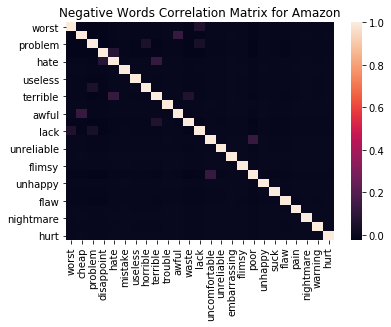

In [54]:
import re
data = pd.DataFrame()

for key in neg_keywords:
    
    data[str(key)] = amazon.sentence.str.count(str(key)  ,flags=re.IGNORECASE    )

target = amazon['score']
plt.title('Negative Words Correlation Matrix for Amazon')

sns.heatmap(data.corr())

In [55]:
multi_nb = MultinomialNB()
# Fit our model to the data.
multi_nb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = multi_nb.predict(data)

#Test the accuracy, sensitivity, and specificity
c = confusion_matrix(target, y_pred)

#Accuracy
print('The accuracy of the model is: ', (data.shape[0] - (target != y_pred).sum())/data.shape[0])

#Sensitivity
print('The sensitivity of the model is: {}'.format((c[1][1])/(c[1][1] + c[1][0])))

#Specificity
print('The specificity of the model is: {}'.format((c[0][0])/(c[0][0] + c[0][1])))

The accuracy of the model is:  0.482
The sensitivity of the model is: 0.056
The specificity of the model is: 0.908


# Iteration 4:
#1. applying MultinomialNB with holdout group

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(multi_nb.fit(X_train, y_train).score(X_test, y_test)))

With 20% Holdout: 0.46


#2. Using Cross validation and Appying  MultinomialNB

In [74]:
ten_fold = cross_val_score(multi_nb, data, target, cv=10)
print("The Average Accuracy : " , ten_fold.mean())
print("Standard Deviation : " , ten_fold.std())

The Average Accuracy :  0.473
Standard Deviation :  0.0283019433962


The accuracy is 47%.

# Analyse based on positive words

# Iteration :
Appying BernoulliNB on full dataset

In [70]:
pos_keywords = ['great','good','love','recommend','nice','excellent', 'best','simple', 'beautiful'
            ,'satisfied','quality','easy','well', 'must have','happy', 'sturdy','fast','pleased',
           'superb',   'incredible','helpful','fine','fit','comfortable','deal']

print(len(pos_keywords))

25


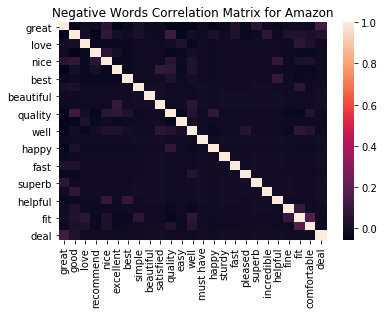

In [59]:
# create columns for every keyword
pos_data = pd.DataFrame()
for key in pos_keywords:
    
    pos_data[str(key)] = amazon.sentence.str.contains(str(key)  ,case=False    )

pos_target = amazon['score']
plt.title('Negative Words Correlation Matrix for Amazon')
sns.heatmap(pos_data.corr())


In [60]:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(pos_data, pos_target)

# Classify, storing the result in a new variable.
pos_y_pred = bnb.predict(pos_data)
#Test the accuracy, sensitivity, and specificity

from sklearn.metrics import confusion_matrix
c = confusion_matrix(pos_target, pos_y_pred)

#Accuracy
print('The accuracy of the model is: ', (pos_data.shape[0] - (pos_target != pos_y_pred).sum())/pos_data.shape[0]) 

#Sensitivity
print('The sensitivity of the model is: {}'.format((c[1][1])/(c[1][1] + c[1][0])))

#Specificity
print('The specificity of the model is: {}'.format((c[0][0])/(c[0][0] + c[0][1])))


The accuracy of the model is:  0.775
The sensitivity of the model is: 0.658
The specificity of the model is: 0.892


When analysed based on positive keywords and applied BernoulliNB on full dataset, the accuracy is 77%.

# Iteration :
#1. Using holdout group and Appying BernoulliNB

In [61]:
X_train, X_test, y_train, y_test = train_test_split(pos_data, pos_target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

With 20% Holdout: 0.75


With 20 % holdout, the accuracy is 75% which is less than the accuracy which we got when same classifier applied on full dataset.

#2. Using Cross validation and Appying BernoulliNB

In [76]:
ten_fold = cross_val_score(bnb, pos_data, pos_target, cv=10)
print("The Average Accuracy : " , ten_fold.mean())
print("Standard Deviation : " , ten_fold.std())

The Average Accuracy :  0.764
Standard Deviation :  0.0471593044902


The accuracy is 76%

# Iteration :
Applying MultinomialNB on full dataset

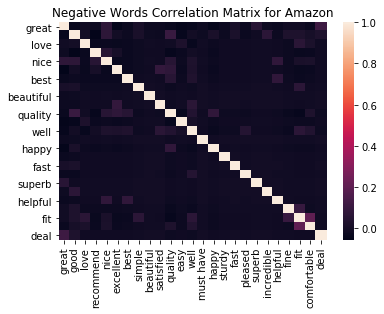

In [63]:
import re
pos_data = pd.DataFrame()
for key in pos_keywords:
    
    pos_data[str(key)] = amazon.sentence.str.count(str(key)  ,flags=re.IGNORECASE    )

pos_target = amazon['score']
plt.title('Negative Words Correlation Matrix for Amazon')
sns.heatmap(pos_data.corr())

In [64]:
multi_nb = MultinomialNB()
# Fit our model to the data.
multi_nb.fit(pos_data, pos_target)

# Classify, storing the result in a new variable.
pos_y_pred = multi_nb.predict(pos_data)
#Test the accuracy, sensitivity, and specificity

from sklearn.metrics import confusion_matrix
c = confusion_matrix(pos_target, pos_y_pred)

#Accuracy
print('The accuracy of the model is: ', (pos_data.shape[0] - (pos_target != pos_y_pred).sum())/pos_data.shape[0]) 

#Sensitivity
print('The sensitivity of the model is: {}'.format((c[1][1])/(c[1][1] + c[1][0])))

#Specificity
print('The specificity of the model is: {}'.format((c[0][0])/(c[0][0] + c[0][1])))


The accuracy of the model is:  0.712
The sensitivity of the model is: 0.482
The specificity of the model is: 0.942


When analysed based on positive keywords and applied BernoulliNB on full dataset, the accuracy was 77%.
But with multinomialNB, the accuracy of the model reduced to 71%. 

# Iteration 
#1. applying MultinomialNB with holdout group

In [65]:
X_train, X_test, y_train, y_test = train_test_split(pos_data, pos_target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(multi_nb.fit(X_train, y_train).score(X_test, y_test)))


With 20% Holdout: 0.64


When applied BernoulliNB with holdout group, the accuracy was 75%, now when MultinomialNB is applied, the accuracy reduced to 64%

#2. Using Cross validation and Appying MultinomialNB

In [73]:
ten_fold = cross_val_score(multi_nb, pos_data, pos_target, cv=10)
print("The Average Accuracy : " , ten_fold.mean())
print("Standard Deviation : " , ten_fold.std())

The Average Accuracy :  0.669
Standard Deviation :  0.0385875627631


The accuracy is 66%

# Do any of your classifiers seem to overfit?
The accuracy does not show more change When applying classifier on full dataset or with holdout group and cross validation. So we do not think there is any overfitting. Also Naive Bayes is actually pretty good for avoiding overfitting.

# Which seem to perform the best? 
When we did the anaysis based on positive keywords, the performance was better. Though there is no class imbalance in the dataset, the model predicted positive reviews better than negative ones.

# Which features seemed to be most impactful to performance?
The positive features are more impactful than the negative words.
